**Title:** Customer Purchase Behavior Analysis and Prediction

**Category:** Customer segmentation

**Objective:** To analyze customer purchase patterns, segment customers into meaningful groups using clustering techniques, and predict future purchase behaviors based on key features using machine learning models.

**Note:** Summary includes the problem statement, methodology for clustering and prediction, and results obtained from the analysis.


**Summary**  
The project investigates customer purchase behavior using a dataset comprising transactions from 2024. It includes attributes like product categories, prices, discounts, final purchase amounts, and payment methods. Two clustering techniques were applied:  
1. **K-Means Clustering** to segment customers based on spending behavior and product preferences.  
2. **DBSCAN** to identify outlier customers and group densely populated spending clusters.  

For predicting final purchase amounts, **Linear Regression** was employed. This model demonstrated strong correlations between discounts, original prices, and the final purchase amounts, effectively modeling customer spending patterns. Visualization techniques like scatter plots and cluster graphs were utilized to reveal patterns in customer behavior, enabling actionable insights into pricing strategies and targeted promotions.


**Presented to:**  

Computer Science and Engineering, JnU  

**Presented By:**  
Dolna Saha puja   

**Data Source:** Kaggle.  

**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Import Data**

In [ ]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv(next(iter(uploaded)))

# Display the first few rows
print(data.head())

Saving ecommerce_dataset_updated_pizus_da.csv to ecommerce_dataset_updated_pizus_da.csv
    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports        36.53          15.0   
1  d38a19bf  fde50f9c-5  Clothing       232.79          20.0   
2  d7f5f0b0  0d96fc90-3    Sports       317.02          25.0   
3  395d4994  964fc44b-d      Toys       173.19          25.0   
4  a83c145c  d70e2fc6-e    Beauty       244.80          20.0   

   Final_Price(Rs.) Payment_Method Purchase_Date  
0             31.05    Net Banking    12/11/2024  
1            186.23    Net Banking      9/2/2024  
2            237.76    Credit Card      1/9/2024  
3            129.89            UPI      1/4/2024  
4            195.84    Net Banking    27-09-2024  


**Preprocessing**

In [ ]:
# Preprocessing
# Handle missing values
data.bfill(inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
data['Category'] = label_enc.fit_transform(data['Category'])
data['Payment_Method'] = label_enc.fit_transform(data['Payment_Method'])

# Feature scaling
scaler = StandardScaler()
numerical_columns = ['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


**Clustering**

In [ ]:
# Clustering: K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data[numerical_columns])

# Clustering: DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data[numerical_columns])


**Visualization: K-Means**

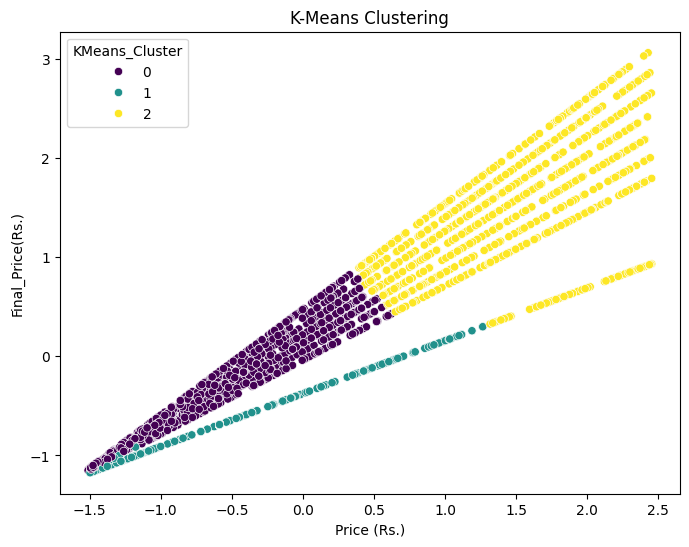

In [ ]:
# Visualization: K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price (Rs.)', y='Final_Price(Rs.)', hue='KMeans_Cluster', data=data, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

Visualization: DBSCAN

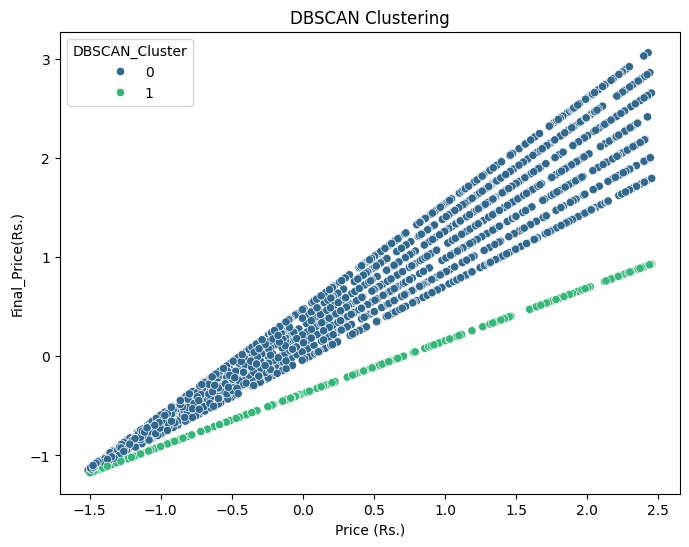

In [ ]:
# Visualization: DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price (Rs.)', y='Final_Price(Rs.)', hue='DBSCAN_Cluster', data=data, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

# Prediction: Linear Regression
**Split the data**

In [ ]:
# Prediction: Linear Regression
# Split the data
X = data[['Price (Rs.)', 'Discount (%)']]
y = data['Final_Price(Rs.)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.030678150385756407
R2 Score: 0.9699459066483515


**Visualization: Predictions vs Actual**

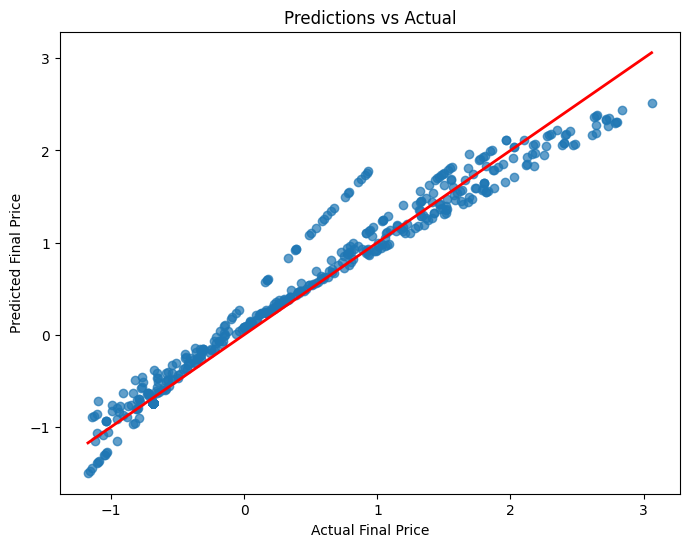

In [ ]:
# Visualization: Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Final Price')
plt.ylabel('Predicted Final Price')
plt.title('Predictions vs Actual')
plt.show()